# EEG EXAM STATISTICAL ANALYSIS 

In [74]:
%%capture

# importing modules
import os
import pip
os.system('python -m pip install mne')
os.system('python -m pip install scikit-learn')
import numpy as np
!pip install pandas
from pandas import *
import mne
from scipy import stats as st
import statistics as stats
from itertools import combinations
import matplotlib.pyplot as plt
import mne
import random

!python -m pip install statsmodels
from statsmodels.stats.multitest import multipletests as multi

In this part of the analysis, we wish to discern whether the difference in signal between our conditions is statistically significant.

We insert our preprocessed data and read in some epochs which we prepared earlier. We will be looking at 3 types of contrast:

- Incorr2/incorr4
- Incorr2/corr
- Incorr4/corr


#### Importing modules

#### Reading in all epochs
We read in the fif.file and assign all epochs to a variable called epochs, and the epochs specific to the 3 conditions that we'll be using (incorr2, incorr4, and corr).

In [75]:
epochs = mne.read_epochs("/work/EmmaRisgaardOlsen#9993/fif_files/epochs.fif")


incorr2 = epochs['recog_phase/incorr2/second']
print(incorr2)
incorr4 = epochs['recog_phase/incorr4/fourth']
corr = epochs['recog_phase/corr/fifth']

Reading /work/EmmaRisgaardOlsen#9993/fif_files/epochs.fif ...
    Found the data of interest:
        t =    -200.00 ...     596.00 ms
        0 CTF compensation matrices available
0 bad epochs dropped
Not setting metadata
417 matching events found
No baseline correction applied
0 projection items activated
<EpochsFIF |  30 events (all good), -0.2 - 0.596 sec, baseline -0.2 – 0 sec, ~1.4 MB, data loaded,
 'recog_phase/incorr2/second/1': 4
 'recog_phase/incorr2/second/3': 4
 'recog_phase/incorr2/second/4': 4
 'recog_phase/incorr2/second/6': 4
 'recog_phase/incorr2/second/7': 4
 'recog_phase/incorr2/second/8': 4
 'recog_phase/incorr2/second/9': 3
 'recog_phase/incorr2/second/5': 3>


/tmp/ipykernel_48/2656234500.py:1: RuntimeWarning: This filename (/work/EmmaRisgaardOlsen#9993/fif_files/epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs("/work/EmmaRisgaardOlsen#9993/fif_files/epochs.fif")


## Windowed mean
One of the simplest way in which we can determine whether the signal in our two conditions are statistically significant is by:

1) Segmenting our data using only certain channels in a specific time window. Keep in mind that which time window and channels should be established a priori, for instance according to the literature. 
2) Taking the mean of that window across channels and and samples.
3) Running statistical tests on the windowed means from the two conditions.

In an experiment with multiple participants we would also average over trials from individual participants, in order to only have one data point per participant (and thereby avoid multiple comparisons). However, since we have one participant, we can keep one dimension of the individual data, i.e. the trials.

### T-test
We can now do a t-test on the trials from the two conditions, to establish whether the means of the two groups are statistically significant.

We can use the get_data() function to get the numerical values of the signal (in microvolts) for the t-test. tmin and tmax are used to define the size of the window, and the picks are the channels that we expect to see an effect in.

## incorr2 VS incorr4 P300

In [76]:
incorr2_data = incorr2.get_data(picks=['P3','Fz','Cz','Pz','Oz'], tmin=.3, tmax=.6)
print(incorr2_data.shape)

incorr4_data = incorr4.get_data(picks=['P3','Fz','Cz','Pz','Oz'], tmin=.3, tmax=.6)
print(incorr4_data.shape)

corr_data = corr.get_data(picks=['P3','Fz','Cz','Pz','Oz'], tmin=.3, tmax=.6)
print(corr_data.shape)

(30, 5, 75)
(29, 5, 75)
(31, 5, 75)


In [77]:
incorr2_mean = np.mean(incorr2_data, axis=2) # averaging over the third dimension of the data
incorr2_mean = np.mean(incorr2_mean, axis=1) # everaging under the second dimension

incorr4_mean = np.mean(incorr4_data, axis=2) # averaging over the third dimension of the data
incorr4_mean = np.mean(incorr4_mean, axis=1) # everaging under the second dimension

corr_mean = np.mean(corr_data, axis=2) # averaging over the third dimension of the data
corr_mean = np.mean(corr_mean, axis=1) # everaging under the second dimension

print(incorr2_mean.shape)
print(incorr4_mean.shape)
print(corr_mean.shape)

(30,)
(29,)
(31,)


In [78]:
from scipy import stats as st
import statistics as stats

st.ttest_ind(a=incorr2_mean, b=incorr4_mean)

Ttest_indResult(statistic=-0.9577767767951102, pvalue=0.34222027308130354)

## incorr2 VS corr P300

In [79]:
incorr2_data = incorr2.get_data(picks=['P3','Fz','Cz','Pz','Oz'], tmin=.3, tmax=.6)
print(incorr2_data.shape)

corr_data = corr.get_data(picks=['P3','Fz','Cz','Pz','Oz'], tmin=.3, tmax=.6)
print(corr_data.shape)

(30, 5, 75)
(31, 5, 75)


In [80]:
incorr2_mean = np.mean(incorr2_data, axis=2) # averaging over the third dimension of the data
print(incorr2_mean.shape)

incorr2_mean = np.mean(incorr2_mean, axis=1) # averaging over the second dimension of the data
print(incorr2_mean.shape)

corr_mean = np.mean(corr_data, axis=2)
corr_mean = np.mean(corr_mean, axis=1)

(30, 5)
(30,)


In [81]:
st.ttest_ind(a=incorr2_mean, b=corr_mean)

Ttest_indResult(statistic=1.0341467435463916, pvalue=0.305287917442314)

## incorr4 VS corr P300

In [82]:
incorr4_data = incorr4.get_data(picks=['P3','Fz','Cz','Pz','Oz'], tmin=.3, tmax=.6)
print(incorr4_data.shape)

corr_data = corr.get_data(picks=['P3','Fz','Cz','Pz','Oz'], tmin=.3, tmax=.6)
print(corr_data.shape)

(29, 5, 75)
(31, 5, 75)


In [83]:
incorr4_mean = np.mean(incorr4_data, axis=2) # averaging over the third dimension of the data
print(incorr2_mean.shape)

incorr4_mean = np.mean(incorr4_mean, axis=1) # averaging over the second dimension of the data
print(incorr4_mean.shape)

corr_mean = np.mean(corr_data, axis=2)
corr_mean = np.mean(corr_mean, axis=1)

(30,)
(29,)


In [84]:
st.ttest_ind(a=incorr4_mean, b=corr_mean)

Ttest_indResult(statistic=2.0315503576305805, pvalue=0.04678943515110023)

In [85]:
# Anova function
def Anova_Epochs(Epoch_Condition, tmin, tmax, channels):
    n_conditions = range(len(Epoch_Condition))
    data = []
    for i in n_conditions:
        data.append(Epoch_Condition[i].get_data(picks=channels, tmin=tmin, tmax=tmax))
    
    means = []
    for i in n_conditions:
        mean_temp = np.mean(data[i], axis=2)
        means.append(np.mean(mean_temp, axis=1))
    
    res = stat()
    return st.f_oneway(*means)

In [86]:
# P300 with the channels: 'P3','Fz','Cz','Pz','Oz'
print(Anova_Epochs(Epoch_Condition = [incorr2, incorr4, corr], 
             tmin = .300, 
             tmax = .600,
             channels = ['P3','Fz','Cz','Pz','Oz']))

NameError: name 'stat' is not defined

In [87]:
# vMMN with the channels Pz, Oz,P7,P8
print(Anova_Epochs(Epoch_Condition = [incorr2, incorr4, corr], 
             tmin = .150, 
             tmax = .250,
             channels = ['Pz', 'Oz','P7','P8']))

NameError: name 'stat' is not defined

In [88]:
# T test function 
def Ttest_Epochs(Epoch_Condition, tmin, tmax, channels):
    data = []
    for i in range(2):
        data.append(Epoch_Condition[i].get_data(picks=channels, tmin=tmin, tmax=tmax))
    
    means = []
    for i in range(2):
        mean_temp = np.mean(data[i], axis=2)
        means.append(np.mean(mean_temp, axis=1))
    
    return st.ttest_ind(a=means[0], b=means[1])  

In [89]:
# P300 t test

In [90]:
print(Ttest_Epochs(Epoch_Condition = [incorr2, incorr4, corr], 
             tmin = .300, 
             tmax = .600,
             channels = ['P3','Fz','Cz','Pz','Oz']))

Ttest_indResult(statistic=-0.9577767767951102, pvalue=0.34222027308130354)


In [91]:
print(Ttest_Epochs(Epoch_Condition = [incorr2, incorr4, corr], 
             tmin = .100, 
             tmax = .250,
             channels = ['Pz', 'Oz','P7','P8']))

Ttest_indResult(statistic=-0.6271320334695694, pvalue=0.5330767862885437)


In [92]:
def pairwise_Ttest(Epoch_Condition, tmin, tmax, channels, Epoch_Names):
    n_conditions = range(len(Epoch_Condition))
    data = []
    for i in n_conditions:
        data.append(Epoch_Condition[i].get_data(picks=channels, tmin=tmin, tmax=tmax))
    
    means = []
    for i in n_conditions:
        mean_temp = np.mean(data[i], axis=2)
        means.append(np.mean(mean_temp, axis=1))
    
    ## create empty lists
    pairwise_names = []
    pairwise_pval = []
    pairwise_tstat = []
    
    ## make all the combinations
    for a, b in combinations(Epoch_Names, 2): 
        y = f"{a} vs. {b}"
        pairwise_names.append(y)
        
    for a, b in combinations(means, 2): # function which make all combinations of 2 means possible
        y = st.ttest_ind(a, b)
        pairwise_pval.append(y.pvalue)
        pairwise_tstat.append(y.statistic)
    
    
    bonferroni = multi(pairwise_pval, alpha=0.05, method='bonferroni', is_sorted=False, returnsorted=False)
    
    ## create dataframe
    data = DataFrame({"Comparison":pairwise_names, "P-Value":pairwise_pval, "t-statistic":pairwise_tstat, "Bonferroni Adj.":bonferroni[1]})
    
    return data

In [93]:
# P300
pairwise = pairwise_Ttest(Epoch_Condition = [incorr2, incorr4, corr], 
             tmin = .300, 
             tmax = .600,
             channels = ['P3','Fz','Cz','Pz','Oz'],
             Epoch_Names = ["Incorr2", "Incorr4", "corr"]
              )

pairwise

,Comparison,P-Value,t-statistic,Bonferroni Adj.
0,Incorr2 vs. Incorr4,0.342220,-0.957777,1.000000
1,Incorr2 vs. corr,0.305288,1.034147,0.915864
2,Incorr4 vs. corr,0.046789,2.031550,0.140368


In [94]:
# vMMN
pairwise = pairwise_Ttest(Epoch_Condition = [incorr2, incorr4, corr], 
             tmin = .100, 
             tmax = .250,
             channels = ['Pz', 'Oz','P7','P8'],
             Epoch_Names = ["Incorr2", "Incorr4", "corr"]
              )

pairwise

,Comparison,P-Value,t-statistic,Bonferroni Adj.
0,Incorr2 vs. Incorr4,0.533077,-0.627132,1.000000
1,Incorr2 vs. corr,0.358427,0.925595,1.000000
2,Incorr4 vs. corr,0.144979,1.477397,0.434937


## Cluster-based Permutation Testing

The null hypothesis (H0) is that the data in the two conditions comes from the same probability distribution (i.e. they are interchangeable). In order to test this we scramble the data in the conditions n amount of times to get an idea of what distributions of cluster sizes we would expect if there is no difference between conditions. Based on this distribution we can establish how large a cluster should be to cross our significance level (e.g. 0.05) and then compare this to the clusters based on our conditions. If the highest value from our clusters is larger, this suggests that the data in the conditions are not interchangeable (i.e. the difference between them is significant).

Can be done using mne package (https://mne.tools/stable/generated/mne.stats.permutation_cluster_test.html)

Helpful links: https://benediktehinger.de/blog/science/statistics-cluster-permutation-test/ and https://www.fieldtriptoolbox.org/tutorial/cluster_permutation_timelock/

In [95]:
# getting the data from our conditions
X = [epochs[k].get_data() for k in ['recog_phase/incorr2/second', 'recog_phase/incorr4/fourth','recog_phase/corr']]
print(X[0].shape)

# transposing
X = [np.transpose(x, (0, 2, 1)) for x in X]
print(X[0].shape)

(30, 30, 200)
(30, 200, 30)


## Finding channel adjacency

Could not find a adjacency matrix for the data. Computing adjacency based on Delaunay triangulations.
-- number of adjacent vertices : 30


Text(0.5, 1.0, 'Between-sensor adjacency')

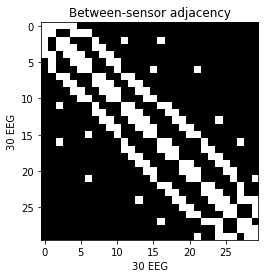

In [97]:
import matplotlib.pyplot as plt

# finding channel adjacency: informs us which channels are next to each other (for co-localisation)
adjacency, ch_names = mne.channels.find_ch_adjacency(epochs.info, ch_type='eeg')

# plotting between-sensor adjacency
plt.imshow(adjacency.toarray(), cmap='gray',
           interpolation='nearest')
plt.xlabel('{} EEG'.format(len(ch_names)))
plt.ylabel('{} EEG'.format(len(ch_names)))
plt.title('Between-sensor adjacency')

In [98]:
# set family-wise p-value
p_accept = 0.05

# running the permutation test with 2000 permutations and a random seed of 4
cluster_stats = mne.stats.spatio_temporal_cluster_test(X, n_permutations=2000, tail=0,
                                             n_jobs=-1, buffer_size=None, adjacency=adjacency, seed=4)

# selecting clusters with significant p-values
T_obs, clusters, p_values, _ = cluster_stats
good_cluster_inds = np.where(p_values < p_accept)[0]

Using a threshold of 3.038670
stat_fun(H1): min=0.000269 max=16.846831
Running initial clustering
Found 54 clusters
Permuting 1999 times...


/tmp/ipykernel_48/174796038.py:5: RuntimeWarning: Ignoring argument "tail", performing 1-tailed F-test
  cluster_stats = mne.stats.spatio_temporal_cluster_test(X, n_permutations=2000, tail=0,


  0%|          |  : 0/1999 [00:00<?,       ?it/s]

Computing cluster p-values
Done.


In [65]:
print(p_values)
print(good_cluster_inds)

[1.000e+00 6.600e-02 1.000e+00 1.000e+00 1.000e+00 1.000e+00 3.765e-01
 1.000e+00 1.000e+00 1.000e+00 1.000e+00 9.975e-01 9.415e-01 1.000e+00
 1.000e+00 1.000e+00 1.800e-02 1.000e+00 1.000e+00 1.000e+00 1.000e+00
 1.000e+00 1.000e+00 1.000e+00 1.400e-02 1.000e+00 1.000e+00 1.000e+00
 1.000e+00 1.000e+00 9.995e-01 9.990e-01 1.000e+00 1.000e+00 1.000e+00
 1.000e+00 1.000e+00 1.000e+00 5.000e-04 1.000e+00 1.240e-01 9.845e-01
 1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00
 1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00]
[16 24 38]


## Permutation analysis incorr2 vs corr

(30, 30, 200)
(30, 200, 30)
combining channels using "gfp"
combining channels using "gfp"


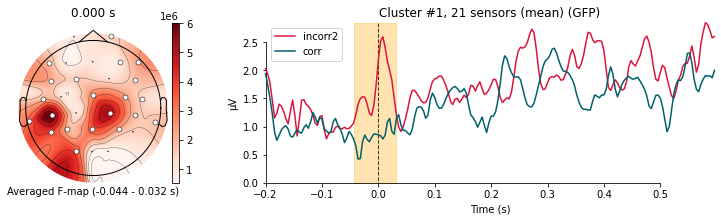

combining channels using "gfp"
combining channels using "gfp"


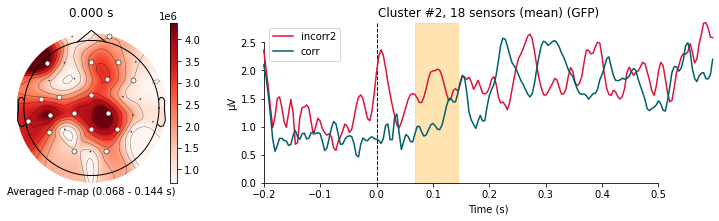

combining channels using "gfp"
combining channels using "gfp"


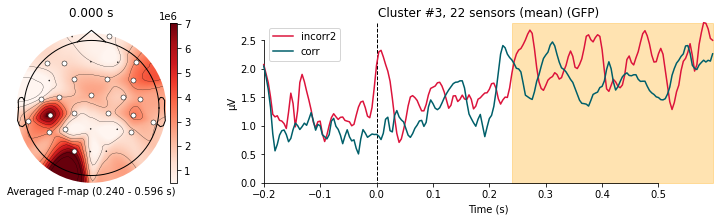

In [100]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

#creating new adjacency matrix
X = [epochs[k].get_data() for k in ['recog_phase/incorr2/second', 'recog_phase/corr/fifth']]
print(X[0].shape)


# transposing
X = [np.transpose(x, (0, 2, 1)) for x in X]
print(X[0].shape)


# configuration of variables for visualisation
colors = {"incorr2": "crimson", "corr": "#005f6a"}

# organising data for plotting
evokeds = {cond: epochs[cond].average() for cond in ["recog_phase/incorr2/second", "recog_phase/corr/fifth"]} 

# looping over clusters
for i_clu, clu_idx in enumerate(good_cluster_inds):
    # unpacking cluster information
    time_inds, space_inds = np.squeeze(clusters[clu_idx])
    ch_inds = np.unique(space_inds)
    time_inds = np.unique(time_inds)

    # topography for F stat
    f_map = T_obs[time_inds, ...].mean(axis=0)

    # getting signals at the sensors contributing to the cluster
    sig_times = epochs.times[time_inds]

    # creating spatial mask
    mask = np.zeros((f_map.shape[0], 1), dtype=bool)
    mask[ch_inds, :] = True

    # initialising the figure
    fig, ax_topo = plt.subplots(1, 1, figsize=(10, 3))

    # plotting average test statistic and mark significant sensors
    f_evoked = mne.EvokedArray(f_map[:, np.newaxis], epochs.info, tmin=0)
    f_evoked.plot_topomap(times=0, mask=mask, axes=ax_topo, cmap='Reds',
                          vmin=np.min, vmax=np.max, show=False,
                          colorbar=False, mask_params=dict(markersize=10))
    image = ax_topo.images[0]

    # creating additional axes (for ERF and colorbar)
    divider = make_axes_locatable(ax_topo)

    # adding axes for colourbar
    ax_colorbar = divider.append_axes('right', size='5%', pad=0.05)
    plt.colorbar(image, cax=ax_colorbar)
    ax_topo.set_xlabel(
        'Averaged F-map ({:0.3f} - {:0.3f} s)'.format(*sig_times[[0, -1]]))

    # adding new axis for time courses and plot time courses
    ax_signals = divider.append_axes('right', size='300%', pad=1.2)
    title = 'Cluster #{0}, {1} sensor'.format(i_clu + 1, len(ch_inds))
    if len(ch_inds) > 1:
        title += "s (mean)"
    mne.viz.plot_compare_evokeds(evokeds, title=title, picks=ch_inds, axes=ax_signals,
                         colors=colors, show=False,
                         split_legend=True, truncate_yaxis='auto')

    # plotting temporal cluster extent
    ymin, ymax = ax_signals.get_ylim()
    ax_signals.fill_betweenx((ymin, ymax), sig_times[0], sig_times[-1],
                             color='orange', alpha=0.3)

    # clean-up
    mne.viz.tight_layout(fig=fig)
    fig.subplots_adjust(bottom=.05)
    plt.show()

## Permutation incorr4 vs corr

(29, 30, 200)
(29, 200, 30)
combining channels using "gfp"
combining channels using "gfp"


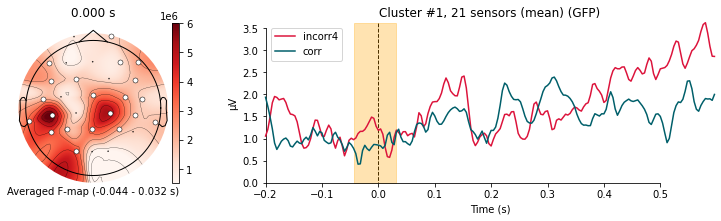

combining channels using "gfp"
combining channels using "gfp"


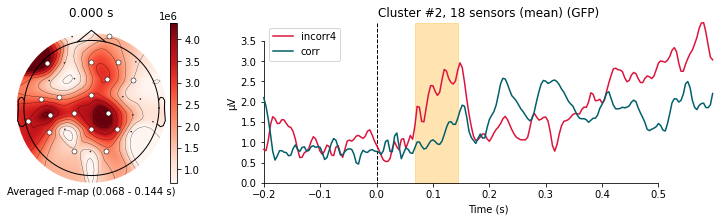

combining channels using "gfp"
combining channels using "gfp"


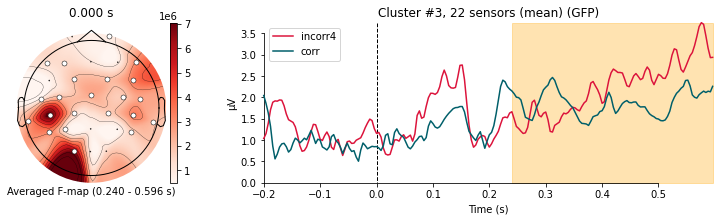

In [101]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

#creating new adjacency matrix
X = [epochs[k].get_data() for k in ['recog_phase/incorr4/fourth', 'recog_phase/corr/fifth']]
print(X[0].shape)


# transposing
X = [np.transpose(x, (0, 2, 1)) for x in X]
print(X[0].shape)


# configuration of variables for visualisation
colors = {"incorr4": "crimson", "corr": "#005f6a"}

# organising data for plotting
evokeds = {cond: epochs[cond].average() for cond in ["recog_phase/incorr4/fourth", "recog_phase/corr/fifth"]} 

# looping over clusters
for i_clu, clu_idx in enumerate(good_cluster_inds):
    # unpacking cluster information
    time_inds, space_inds = np.squeeze(clusters[clu_idx])
    ch_inds = np.unique(space_inds)
    time_inds = np.unique(time_inds)

    # topography for F stat
    f_map = T_obs[time_inds, ...].mean(axis=0)

    # getting signals at the sensors contributing to the cluster
    sig_times = epochs.times[time_inds]

    # creating spatial mask
    mask = np.zeros((f_map.shape[0], 1), dtype=bool)
    mask[ch_inds, :] = True

    # initialising the figure
    fig, ax_topo = plt.subplots(1, 1, figsize=(10, 3))

    # plotting average test statistic and mark significant sensors
    f_evoked = mne.EvokedArray(f_map[:, np.newaxis], epochs.info, tmin=0)
    f_evoked.plot_topomap(times=0, mask=mask, axes=ax_topo, cmap='Reds',
                          vmin=np.min, vmax=np.max, show=False,
                          colorbar=False, mask_params=dict(markersize=10))
    image = ax_topo.images[0]

    # creating additional axes (for ERF and colorbar)
    divider = make_axes_locatable(ax_topo)

    # adding axes for colourbar
    ax_colorbar = divider.append_axes('right', size='5%', pad=0.05)
    plt.colorbar(image, cax=ax_colorbar)
    ax_topo.set_xlabel(
        'Averaged F-map ({:0.3f} - {:0.3f} s)'.format(*sig_times[[0, -1]]))

    # adding new axis for time courses and plot time courses
    ax_signals = divider.append_axes('right', size='300%', pad=1.2)
    title = 'Cluster #{0}, {1} sensor'.format(i_clu + 1, len(ch_inds))
    if len(ch_inds) > 1:
        title += "s (mean)"
    mne.viz.plot_compare_evokeds(evokeds, title=title, picks=ch_inds, axes=ax_signals,
                         colors=colors, show=False,
                         split_legend=True, truncate_yaxis='auto')

    # plotting temporal cluster extent
    ymin, ymax = ax_signals.get_ylim()
    ax_signals.fill_betweenx((ymin, ymax), sig_times[0], sig_times[-1],
                             color='orange', alpha=0.3)

    # clean-up
    mne.viz.tight_layout(fig=fig)
    fig.subplots_adjust(bottom=.05)
    plt.show()

(30, 30, 200)
(30, 200, 30)
combining channels using "gfp"
combining channels using "gfp"


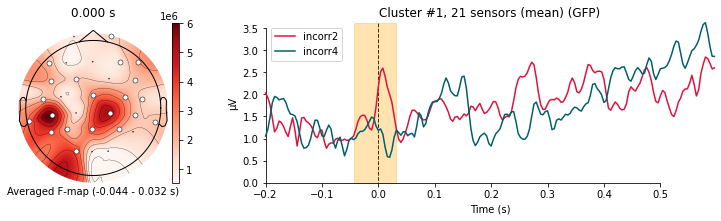

combining channels using "gfp"
combining channels using "gfp"


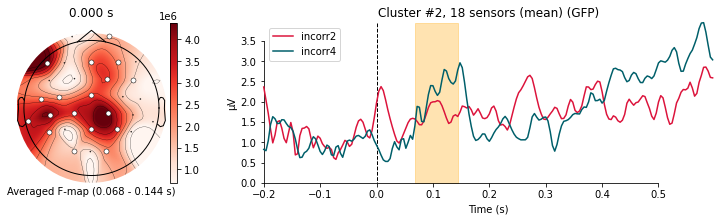

combining channels using "gfp"
combining channels using "gfp"


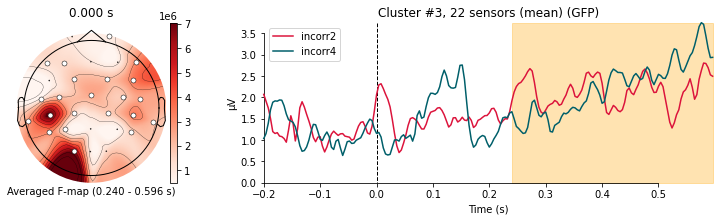

In [73]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

#creating new adjacency matrix
X = [epochs[k].get_data() for k in ['recog_phase/incorr2/second', 'recog_phase/incorr4/fourth']]
print(X[0].shape)


# transposing
X = [np.transpose(x, (0, 2, 1)) for x in X]
print(X[0].shape)


# configuration of variables for visualisation
colors = {"incorr2": "crimson", "incorr4": "#005f6a"}

# organising data for plotting
evokeds = {cond: epochs[cond].average() for cond in ["recog_phase/incorr2/second", "recog_phase/incorr4/fourth"]} 

# looping over clusters
for i_clu, clu_idx in enumerate(good_cluster_inds):
    # unpacking cluster information
    time_inds, space_inds = np.squeeze(clusters[clu_idx])
    ch_inds = np.unique(space_inds)
    time_inds = np.unique(time_inds)

    # topography for F stat
    f_map = T_obs[time_inds, ...].mean(axis=0)

    # getting signals at the sensors contributing to the cluster
    sig_times = epochs.times[time_inds]

    # creating spatial mask
    mask = np.zeros((f_map.shape[0], 1), dtype=bool)
    mask[ch_inds, :] = True

    # initialising the figure
    fig, ax_topo = plt.subplots(1, 1, figsize=(10, 3))

    # plotting average test statistic and mark significant sensors
    f_evoked = mne.EvokedArray(f_map[:, np.newaxis], epochs.info, tmin=0)
    f_evoked.plot_topomap(times=0, mask=mask, axes=ax_topo, cmap='Reds',
                          vmin=np.min, vmax=np.max, show=False,
                          colorbar=False, mask_params=dict(markersize=10))
    image = ax_topo.images[0]

    # creating additional axes (for ERF and colorbar)
    divider = make_axes_locatable(ax_topo)

    # adding axes for colourbar
    ax_colorbar = divider.append_axes('right', size='5%', pad=0.05)
    plt.colorbar(image, cax=ax_colorbar)
    ax_topo.set_xlabel(
        'Averaged F-map ({:0.3f} - {:0.3f} s)'.format(*sig_times[[0, -1]]))

    # adding new axis for time courses and plot time courses
    ax_signals = divider.append_axes('right', size='300%', pad=1.2)
    title = 'Cluster #{0}, {1} sensor'.format(i_clu + 1, len(ch_inds))
    if len(ch_inds) > 1:
        title += "s (mean)"
    mne.viz.plot_compare_evokeds(evokeds, title=title, picks=ch_inds, axes=ax_signals,
                         colors=colors, show=False,
                         split_legend=True, truncate_yaxis='auto')

    # plotting temporal cluster extent
    ymin, ymax = ax_signals.get_ylim()
    ax_signals.fill_betweenx((ymin, ymax), sig_times[0], sig_times[-1],
                             color='orange', alpha=0.3)

    # clean-up
    mne.viz.tight_layout(fig=fig)
    fig.subplots_adjust(bottom=.05)
    plt.show()

In [191]:
print(evokeds)

{'recog_phase/incorr2/second': <Evoked | '0.13 × recog_phase/incorr2/second/1 + 0.13 × recog_phase/incorr2/second/3 + 0.13 × recog_phase/incorr2/second/4 + 0.13 × recog_phase/incorr2/second/6 + 0.13 × recog_phase/incorr2/second/7 + 0.13 × recog_phase/incorr2/second/8 + 0.10 × recog_phase/incorr2/second/9 + 0.10 × recog_phase/incorr2/second/5' (average, N=30), -0.2 – 0.496 sec, baseline -0.2 – 0 sec, 30 ch, ~90 kB>, 'recog_phase/corr/fifth': <Evoked | 'recog_phase/corr/fifth/1' (average, N=31), -0.2 – 0.496 sec, baseline -0.2 – 0 sec, 30 ch, ~90 kB>}
